# Multi Linear Regression - Predicting the salary based on several factors

In [1]:
%cd C:/Users/shrav/Data_Analysis_Projects/Datasets/Multilinear Regression

C:\Users\shrav\Data_Analysis_Projects\Datasets\Multilinear Regression


In [21]:
# Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
# data 
df = pd.read_csv("salaries.csv")
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Data Analysis

In [4]:
desc = df.describe().round(2)
desc

,yrs.since.phd,yrs.service,salary
count,397.00,397.00,397.00
mean,22.31,17.61,113706.46
std,12.89,13.01,30289.04
min,1.00,0.00,57800.00
25%,12.00,7.00,91000.00
50%,21.00,16.00,107300.00
75%,32.00,27.00,134185.00
max,56.00,60.00,231545.00


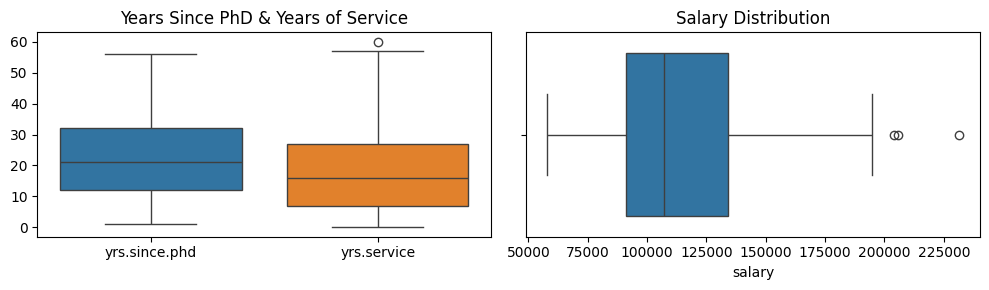

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))  # 1 row, 2 columns

sns.boxplot(data=df[['yrs.since.phd', 'yrs.service']], ax=axes[0])
axes[0].set_title('Years Since PhD & Years of Service')

sns.boxplot(x=df['salary'], ax=axes[1])
axes[1].set_title('Salary Distribution')

plt.tight_layout()
plt.show()


In [7]:
# removing outliers using the IQR formula 

print(f"Before removing outliers: {len(df)}")
for column in desc.columns:
    q1, q3 = desc.loc['25%', column], desc.loc['75%', column]
    iqr = 1.5 * (q3 - q1)
    lv, hv = q1 - iqr, q3 + iqr

    mask = (df[column] > lv) & (df[column] < hv)
    df = df[mask]

print(f"Records after removing outliers: {len(df)}")

Before removing outliers: 397
Records after removing outliers: 392


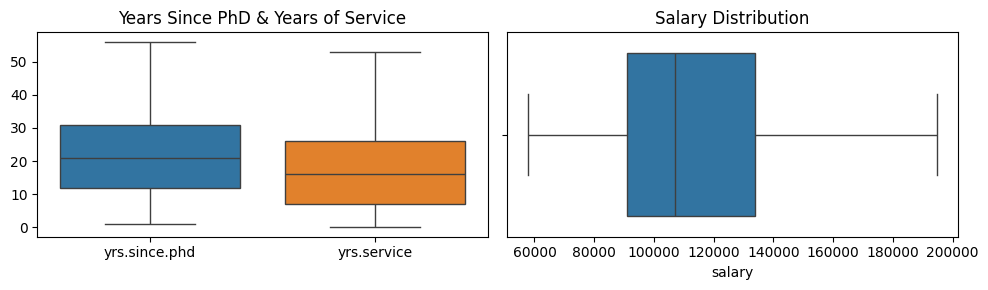

In [8]:
# Plot after outliers removal

fig, axes = plt.subplots(1, 2, figsize=(10, 3))  # 1 row, 2 columns

sns.boxplot(data=df[['yrs.since.phd', 'yrs.service']], ax=axes[0])
axes[0].set_title('Years Since PhD & Years of Service')

sns.boxplot(x=df['salary'], ax=axes[1])
axes[1].set_title('Salary Distribution')

plt.tight_layout()
plt.show()


# Looking for Multi-collinearity

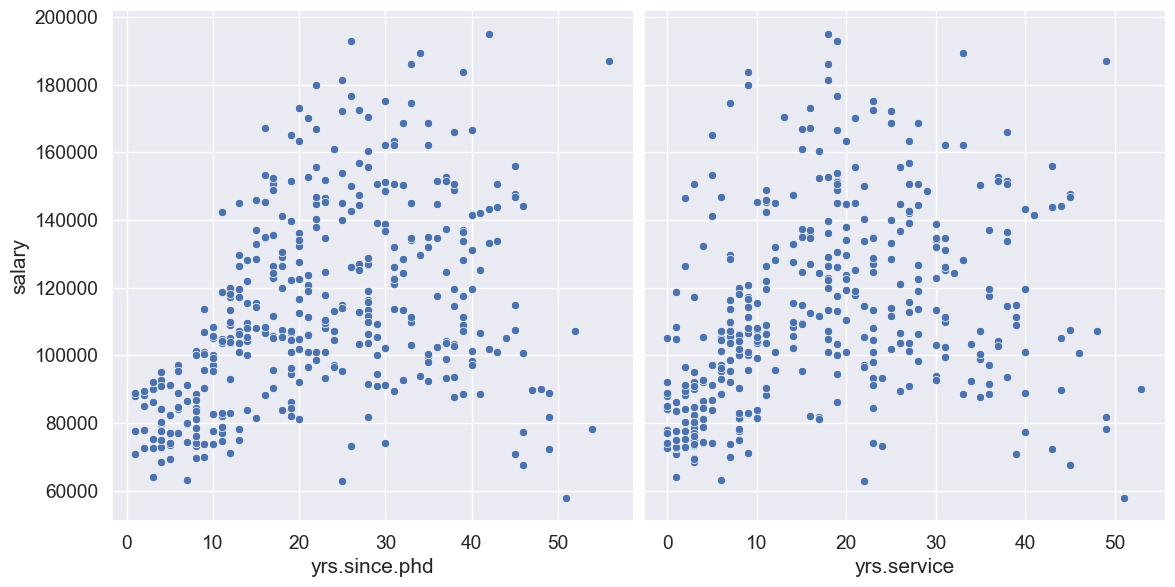

In [9]:
# plotting contiguous independent variable vs dependent variable
sns.set(font_scale=1.25)
sns.pairplot(data= df, 
             y_vars=['salary'], 
             x_vars=["yrs.since.phd", "yrs.service"],
             height=6)

Contiguous attributes yrs.since.phd and yrs.service appear correlated with each other we have to remove one of them, lets check which attribute is relatively more correlated with the salary attribute

<Axes: >

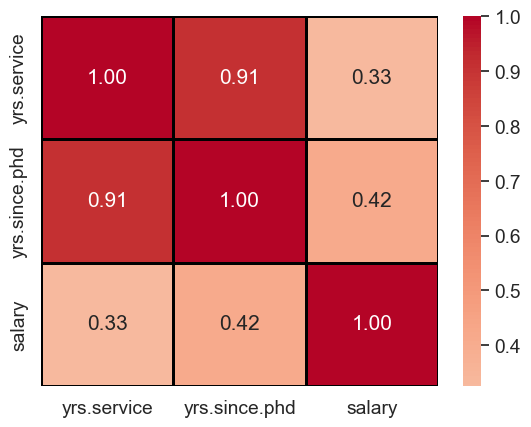

In [10]:
# Correlation Matrix

corr_df = df.loc[:, ['yrs.service', 'yrs.since.phd', 'salary']]
sns.heatmap(corr_df.corr(),
           annot=True,
           fmt='.2f',
           center=0,
           cmap='coolwarm',
           linecolor='black',
           linewidths=1)

**As yrs.since.phd has higher correlation with salary we shall drop yrs.service from our data set**

# Categorical variables

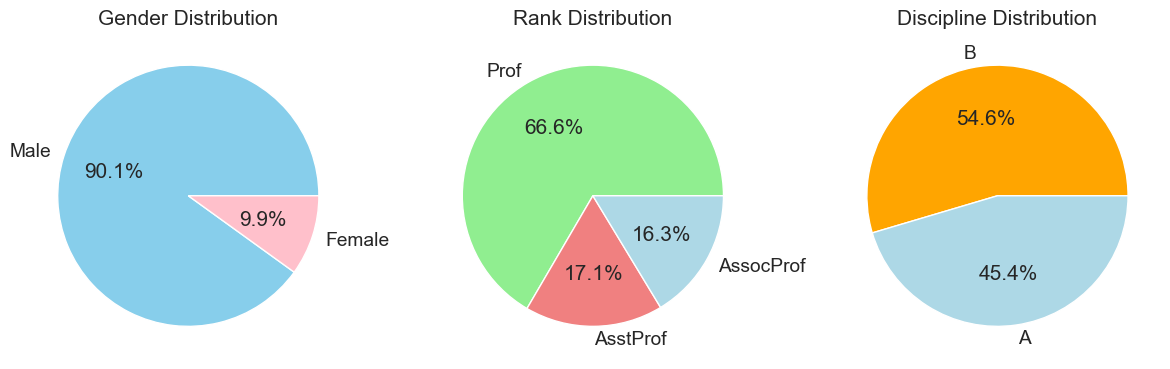

In [11]:
# Plot the distribution of different categorical variables across the dataset
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Gender Distribution
df['sex'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', colors=['skyblue', 'pink'])
axes[0].set_title('Gender Distribution')
axes[0].set_ylabel('') 

# Rank Distribution
df['rank'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
axes[1].set_title('Rank Distribution')
axes[1].set_ylabel('')

# Discipline Distribution
df['discipline'].value_counts().plot.pie(ax=axes[2], autopct='%1.1f%%', colors=['orange', 'lightblue'])
axes[2].set_title('Discipline Distribution')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

**The above categorical variables should be converted to dummy variables**

In [12]:
# Getting dummy variables

df = pd.get_dummies(data=df, drop_first=True, dtype='int')
df.head()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1


**lets also drop the yrs.service column to remove multi-colinearity**

In [13]:
data = df.drop('yrs.service', axis=1)
data.head(1)

,yrs.since.phd,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,139750,0,1,1,1


# Multi linear regression prep

## Reordering the columns

In [14]:
columns = ['yrs.since.phd', 'rank_AsstProf', 'rank_Prof', 'discipline_B', 'sex_Male', 'salary']

data = data[columns]
data.head(1)

,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male,salary
0,19,0,1,1,1,139750


## Splitting the variables 

In [16]:
# splitting the variables

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

## Add a constant 

In [17]:
# Add a constant 
X = sm.add_constant(X)
X.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1
1,1.0,20,0,1,1,1
2,1.0,4,1,0,1,1
3,1.0,45,0,1,1,1
4,1.0,40,0,1,1,1


## train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

## Model prep

In [19]:
model = sm.OLS(endog=y_train, exog=X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     62.77
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           5.95e-45
Time:                        18:14:09   Log-Likelihood:                -3548.6
No. Observations:                 313   AIC:                             7109.
Df Residuals:                     307   BIC:                             7132.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.102e+04   4920.492     16.466

## Prediction 

In [20]:
y_pred = model.predict(X_test)
y_pred[:4]

392    118750.885195
30     134926.583371
137    118936.672941
187    134949.806839
dtype: float64

## Metrics 

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 18185.20237952965
MSE: 548325770.6889964
RMSE: 23416.356904715056


## Residual Plot 

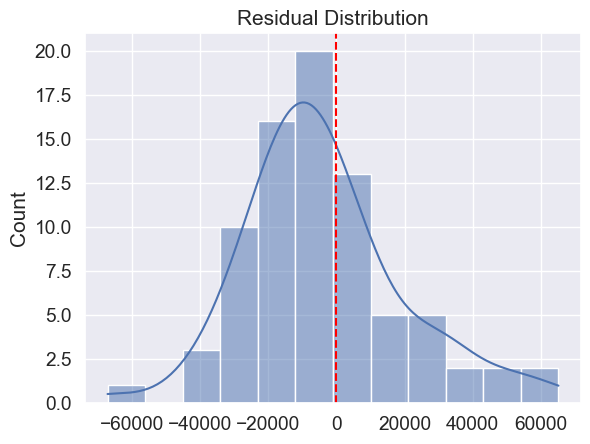

In [24]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

We can do backwards elimination as yrs.since.phd as its statistically insignificant

There wasn't any significant increase in the R2 value after the removal, so we can keep the model as is.